This is where we will implement and code everything....

In [5]:
def uniform_B_field():
"""Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step



    F=q*E + q*v*np.cross(B) 
    MEANS F = whatever + q* [v_x,v_y,v_z] x [B_x,B_y,B_z]
    
        for now we assume no E

"""


    

IndentationError: expected an indented block (<ipython-input-5-e82b356c75fc>, line 49)

In [ ]:
import numpy as np


v_x=float(input("Enter the x-componet of the particle's inital velocity:"))

v_y=float(input("Enter the y-componet of the particle's inital velocity:"))

v_z=float(input("Enter the z-componet of the particle's inital velocity:"))


vel_i = [v_x, v_y,v_z]

In [ ]:
print (vel_i)

In [ ]:
def nonuniform_B_field():
"""Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step




    F=q*E + q*v*np.cross(B) 
    MEANS F = whatever + q* [v_x,v_y,v_z] x [B_x,B_y,B_z]
    
        for now we assume no E

"""

In [1]:
def uniform_torus_area():
    """function to simulate a uniform ring of thickness d and central diameter D
    
       r = d/2
       D = R/2 
       
       return 4*np.pi**2*R*r
       
       ****might not use this"""

In [ ]:
def torus_uniform_B(): 
    """ This will simulate a torus of uniform SURFACE charge density moving through a uniform B field.
        To do this we will pick 8 evenly spaced points inside the torus, plot each of their paths and stack them on top 
        of one another.
        each point is a distance R' from the center of the torus and each is separated by and angle of 45*np.pi/180 
        radians. 
        Each """

In [11]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))

def transverse(vx, vy):
    vt = np.sqrt(vx**2 + vy**2)
    return vt

def nonuniform(u, t):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz, B = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = q*r*B/m
    
    vt = transverse(vx, vy)
    
    a = q*v*B/m
    ax = -a*(x/np.sqrt(x**2 + y**2))
    ay = -a*(y/np.sqrt(x**2 + y**2))
    az = 0
    
    return vx, vy, vz, ax, ay, az, B

p0 = [0, 1, 0, 1, 0, -1, 1]

B = np.random.randint(-10, 10, N)

//anaconda/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


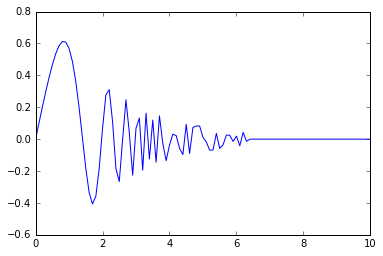

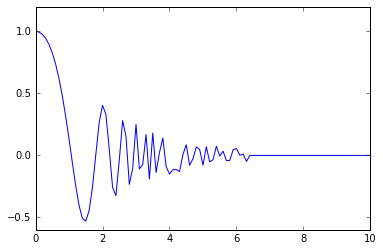

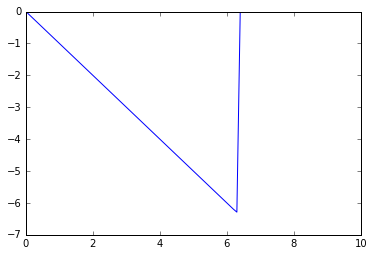

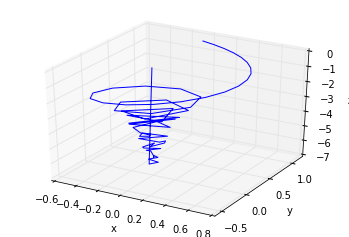

In [12]:
from scipy.integrate import odeint
solution = odeint(nonuniform, p0, t)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, solution[:,0])
plt.show()

plt.plot(t, solution[:,1])
plt.show()

plt.plot(t, solution[:,2])
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [13]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))
B = 1

def uniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 10, 1, 0, -1]
p1 = [1, 0, 10, 0, 1, -1]

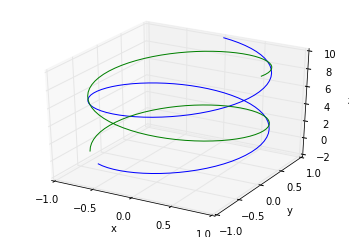

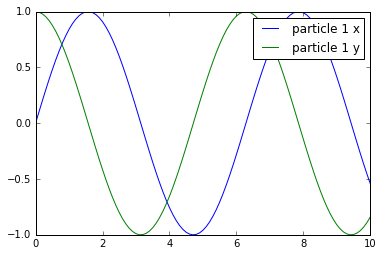

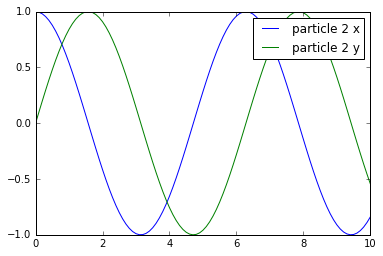

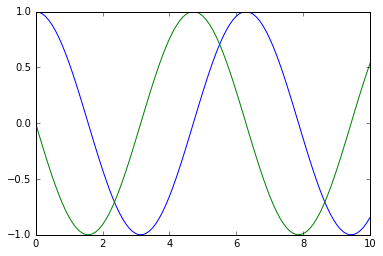

[ 0.5         0.5         0.5         0.5         0.5         0.49999998
  0.49999999  0.5         0.5         0.5         0.49999999  0.49999999
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999998
  0.49999998  0.49999998  0.49999998  0.49999998  0.49999998  0.49999997
  0.49999997  0.49999997  0.49999997  0.49999998  0.49999998  0.49999998
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999
  0.5         0.5         0.5         0.5         0.5         0.5
  0.50000001  0.50000001  0.50000001  0.50000001  0.50000001  0.50000002
  0.50000002  0.50000002  0.50000002  0.50000002  0.50000002  0.50000003
  0.50000003  0.50000003  0.50000003  0.50000003  0.50000004  0.50000004
  0.50000004  0.50000004  0.50000005  0.50000005  0.50000005  0.50000005
  0.50000005  0.50000006  0.50000006  0.50000006  0.50000006  0.50000007
  0.50000007  0.50000007  0.50000008  0.50000008  0.50000008  0.50000009
  0.50000009  0.50000009  0.5000001   0.5000001   0.500000

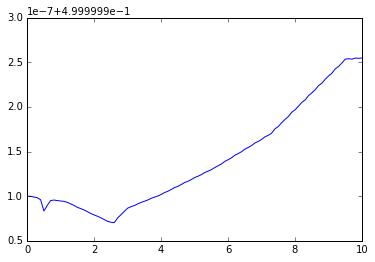

In [14]:
from scipy.integrate import odeint
uniformpart = odeint(uniform, p0, t, args=(B,))
uniform2    = odeint(uniform, p1, t, args=(B,))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(uniformpart[:,0], uniformpart[:,1], uniformpart[:,2])
ax.plot(uniform2[:,0], uniform2[:,1], uniform2[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

plt.plot(t, uniformpart[:,0], label="particle 1 x")
plt.plot(t, uniformpart[:,1], label="particle 1 y")
#plt.plot(t, uniform2[:,0], label="particle 2 x")
#plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()
#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

plt.plot(t, uniform2[:,0], label="particle 2 x")
plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()

plt.plot(t, uniformpart[:,3])
plt.plot(t, uniformpart[:,4])
plt.plot(t, uniformpart[:,5])
plt.show()

energy = (1.0/2)*((uniformpart[:,3])**2 + (uniformpart[:,4])**2)
print (energy)

plt.plot(t, energy)
plt.show()

In [15]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))
B = np.sin(2*np.pi*t)

def oscillating(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = q*r*B/m
    vx = v*x/r
    vy = v*y/r
    
    a = q*v*B/m
    ax = -a*(x/np.sqrt(x**2 + y**2))
    ay = -a*(y/np.sqrt(x**2 + y**2))
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]

In [16]:
from scipy.integrate import odeint
oscilate = odeint(oscillating, p0, t, args=(B,))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(oscilate[:,0], oscilate[:,1], oscilate[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

ValueError: setting an array element with a sequence.

In [10]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 12))
B = 1

def uniform2(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = u
    
    d = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    d = np.sqrt(2)
    
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    v1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)
    v1 = q*r1*B/m
    v2 = np.sqrt(vx2**2 + vy2**2 + vz2**2)
    v2 = q*r2*B/m
    
    a1 = q*v1*B/m
    ax1 = -a1*(x1/r1)
    ay1 = -a1*(y1/r1)
    az1 = -a1*(z1/r1)
    
    a2 = q*v2*B/m
    ax2 = -a2*(x2/r2)
    ay2 = -a2*(y2/r2)
    az2 = -a2*(z2/r2)
    
    return vx1, vy1, vz1, ax1, ay1, az1, vx2, vy2, vz2, ax2, ay2, az2

p0 = [0,  1, 5, 0, 0, 0,
      0, -1, 5, 0, 0, -2]

twoparticles = odeint(uniform2, p0, t, args=(B,))

NameError: name 'odeint' is not defined

In [42]:
#First Try at Infinitely Thin Ring Moving Through UNIFORM B Field 

In [49]:
import numpy as np 

N = 101
t = np.linspace(0,10,N)
u = np.zeros((len(t),47)) 
B = 1

def RING_UNI(a,t,B):
    
    R = 1
    dq = 1   #lambda*dL
    m = 1    #differential mass of the point on the ring 
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3, x4, y4, z4, vx4, vy4, vz4, x5, y5, z5, vx5, vy5, vz5, x6, y6, z6, vx6, vy6, vz6, x7, y7, z7, vx7, vy7, vz7, x8, y8, z8, vx8, vy8, vz8 = u
  
    ################################################
    
    v1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)**.5
    v2 = np.sqrt(vx2**2 + vy2**2 + vz2**2)**.5
    v3 = np.sqrt(vx3**2 + vy3**2 + vz3**2)**.5
    v4 = np.sqrt(vx4**2 + vy4**2 + vz4**2)**.5
    v5 = np.sqrt(vx5**2 + vy5**2 + vz5**2)**.5
    v6 = np.sqrt(vx6**2 + vy6**2 + vz6**2)**.5
    v7 = np.sqrt(vx7**2 + vy7**2 + vz7**2)**.5
    v8 = np.sqrt(vx8**2 + vy8**2 + vz8**2)**.5
    
    ################################################
    
    x1 = 0
    x2 = np.sin(45*np.pi/180)
    x3 = R
    x4 = np.cos(45*np.pi/180)
    x5 = 0
    x6 = -x4
    x7 = -x3
    x8 = -x2
    
    ################################################
    
    a1 = v1**2/R
    a2 = v2**2/R
    a3 = 0
    a4 = v4**2/R
    a5 = -a1
    a6 = -a2
    a7 = 0 
    a8 = -a4

    return [vx1, vy1, vz1, ax1, ay1, az1,
            vx2, vy2, vz2, ax2, ay2, az2, 
            vx3, vy3, vz3, ax3, ay3, az3,
            vx4, vy4, vz4, ax4, ay4, az4,
            vx5, vy5, vz5, ax5, ay5, az5,
            vx6, vy6, vz6, ax6, ay6, az6,
            vx7, vy7, vz7, ax7, ay7, az7,
            vx8, vy8, vz8, ax8, ay8, az8]


# p0 = []

p0 = [0            , 0 , 1            , 0 , 1 , 0,
      1/np.sqrt(2) , 0 , 1/np.sqrt(2) , 0 , 1 , 0,
      1            , 0 , 0            , 0 , 1 , 0,
      1/np.sqrt(2) , 0 , -1/np.sqrt(2), 0 , 1 , 0,
      0            , 0 , 1            , 0 , 1 , 0,
      -1/np.sqrt(2), 0 , -1/np.sqrt(2), 0 , 1 , 0,
      -1           , 0 , 0            , 0 , 1 , 0,
      -1/np.sqrt(2), 0 , 1/np.sqrt(2) , 0 , 1 , 0]         

In [51]:
from scipy.integrate import odeint
Ring = odeint(RING_UNI, p0, t, args = (B,))

ValueError: too many values to unpack (expected 48)